In [3]:
import pandas as pd 
dt = pd.read_csv("covid19_confirmed.csv")
dt2 = pd.read_csv("Global_Mobility_Report.csv")

/Users/irenecho/work/venv/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Covid19_confirmed data preprocessing

In [134]:
usc = dt[dt['Country/Region'] == 'US']
usc = pd.melt(usc, id_vars='Country/Region', value_vars=usc.iloc[:,4:],
        var_name='date', value_name='confirmed_cases')
usc['date'] = pd.to_datetime(usc.date)
usc = usc.rename(columns={'Country/Region':'Country'})
usc.tail(3)

,Country,date,confirmed_cases
125,US,2020-05-26,1680913
126,US,2020-05-27,1699176
127,US,2020-05-28,1721753


In [121]:
len(usc)

128

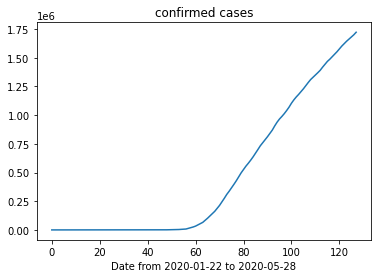

In [135]:
_ = plt.plot(range(0,128),usc['confirmed_cases'])
_ = plt.title('confirmed cases')
_ = plt.xlabel("Date from 2020-01-22 to 2020-05-28")
#_ = plt.xticks(rotation='vertical')

In [131]:
usc['month'] = pd.DatetimeIndex(usc['date']).month
usc2 = round(usc.groupby(['Country','month']).mean(),2)
usc2 = usc2.reset_index()
usc2

,Country,month,confirmed_cases
0,US,1,3.80
1,US,2,21.45
2,US,3,35097.42
3,US,4,650783.47
4,US,5,1425268.29


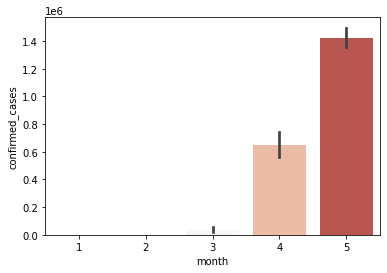

In [129]:
_=sns.barplot(x=usc['month'], y=usc['confirmed_cases'] , palette="RdBu_r")

## Global_Mobility_Report data preprocessing

In [5]:
dt2.head(3)

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0


In [77]:
usm = dt2[dt2['country_region']=='United States']
usm.head(3)

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
170058,US,United States,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
170059,US,United States,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
170060,US,United States,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0


In [78]:
usm = round(usm.groupby(['country_region_code','date']).mean(),2)
usm = usm.reset_index()
usm = usm.rename(columns={'country_region_code':'Country'})


In [79]:
usm['date']=pd.to_datetime(usm.date)
usm.head(3)

,Country,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,2020-02-15,6.44,2.38,16.66,4.31,0.44,-0.55
1,US,2020-02-16,7.99,2.51,17.79,3.75,0.48,-0.66
2,US,2020-02-17,3.87,-0.35,27.88,1.81,-17.58,4.36


## Merge 2 datasets

In [80]:
df =pd.merge(usc,usm,how='inner',on=['Country','date'])

In [81]:
df.head()

,Country,date,confirmed_cases,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,2020-02-15,13,6.44,2.38,16.66,4.31,0.44,-0.55
1,US,2020-02-16,13,7.99,2.51,17.79,3.75,0.48,-0.66
2,US,2020-02-17,13,3.87,-0.35,27.88,1.81,-17.58,4.36
3,US,2020-02-18,13,-0.19,-1.27,5.36,2.24,-0.01,0.79
4,US,2020-02-19,13,2.08,0.58,7.99,2.47,0.88,0.18
